# Result analysis

## Load dataset

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline  

df = pd.read_csv("data-policy-results.csv")

In [6]:
df.head()

,No,Policy type,5 years ago,Sharing mode,Adopt AEA,Unnamed: 5
0,1,Require,No,Data repository,Yes,NaN
1,2,Require,Yes,Journal website,Yes,NaN
2,3,Require,Yes,Journal website,Yes,NaN
3,4,Require,Yes,Journal website,No,NaN
4,5,Require,No,Journal website,Yes,NaN


## First look

Text(0,0.5,u'Number of journals')

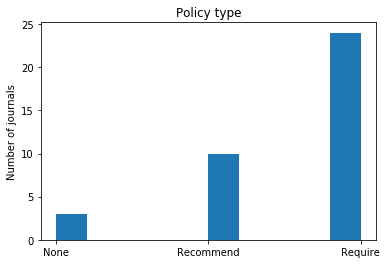

In [7]:
plt.hist(df['Policy type'])
plt.title("Policy type")
plt.ylabel("Number of journals")

(array([ 4.,  0.,  4.,  0.,  0., 21.,  0.,  7.,  0.,  1.]),
 array([-1. , -0.6, -0.2,  0.2,  0.6,  1. ,  1.4,  1.8,  2.2,  2.6,  3. ]),
 <a list of 10 Patch objects>)

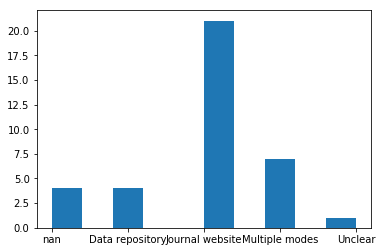

In [8]:
plt.hist(df['Sharing mode'])

#plt.title("Policy type")
#plt.ylabel("Number of journals")